# Disease Diagnosis Using Machine Learning (ML)
The project is inteneded to apply multiple supervised classfication Machine Learning algorithms to a health care data set to check the ability of the ML models to diagnose the disease accurately.

## Data Loading and Data Exploration


We are going to start by loading the dataset from the file into the pandas dataframe. Note: The additional new modules will be imported as required during the code implementation of the project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas
data_file = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv" # the data file location
df = pandas.read_csv(data_file) # reading the data from the data file as pandas dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Now, we will explore the dataset by finding the column names, number of instances for each class values and computing other statistical description of each column

In [ ]:
print("\nThe instances present in the data set are")
print(df.shape,'\n')
print ("And, the columns in the dataset are:\n", (df.columns),'\n')

print("The datatype of each column of the dataset is as below: \n")
print(df.info())


The instances present in the data set are
(768, 9) 

And, the columns in the dataset are:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 

The datatype of each column of the dataset is as below: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   76

The dataset has 8 attribute columns and the class varaible that indicates where the diagnosis of diabetes
is positive or negative is Outcome variable. Outcome 1 means positively diagnosed with diabetes and 0 means negatively diagonsed.

In [ ]:
print("The distribution of diabetes dataset based on Outcome class is:\n" )
print(df.groupby('Outcome').size())
print(" ")


The distribution of diabetes dataset based on Outcome class is:

Outcome
0    500
1    268
dtype: int64
 


In [ ]:
print("The statistical description of each of the attribue of the given diabetes dateset is as below:")
df.drop('Outcome',axis=1).describe(include='all')

The statistical description of each of the attribue of the given diabetes dateset is as below:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Exploratory Visualization


Here, we plot histograms and box plots of attributes to check the constancy of any variable. If any variable is constant through out that can be dropped while traing ML models to diagnose the diabetes

 HISTORGRAMS 


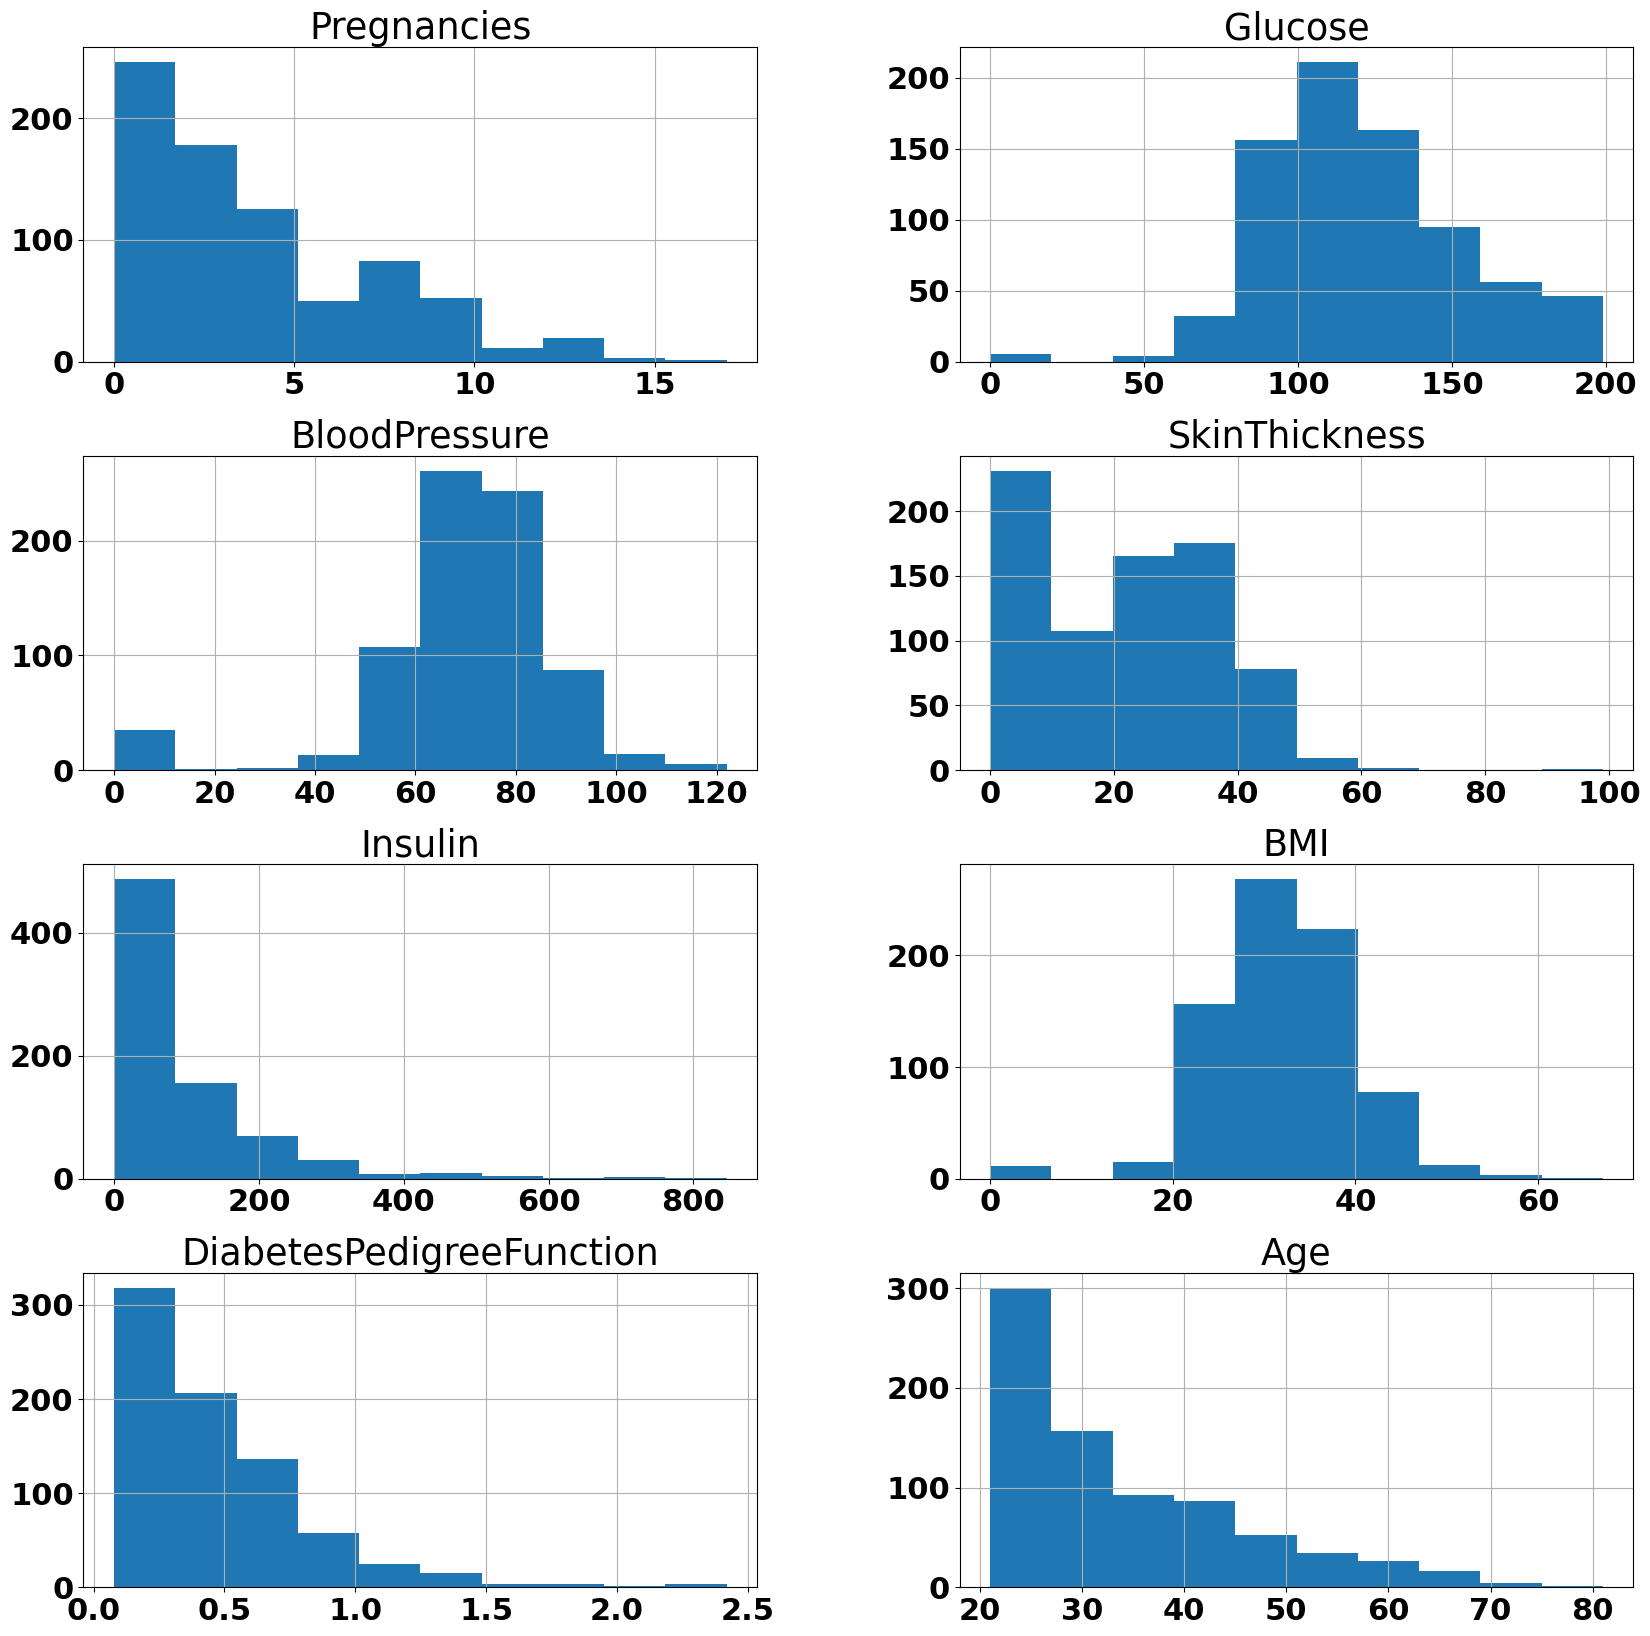

<Figure size 200x200 with 0 Axes>

In [ ]:
# importing module to plot and describing the font size for the plots
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

print(' HISTORGRAMS ')
#Dropping the column with Outcome and drawing historgram for each attribute
temp_df = df.drop('Outcome',axis=1)
temp_df.hist(figsize=(20,20), layout=(4,2))
plt.figure(figsize=(2, 2))
plt.show()

Here, no attribue is constant through out due to which we are not going to drop any of the attributes for the further analysis.

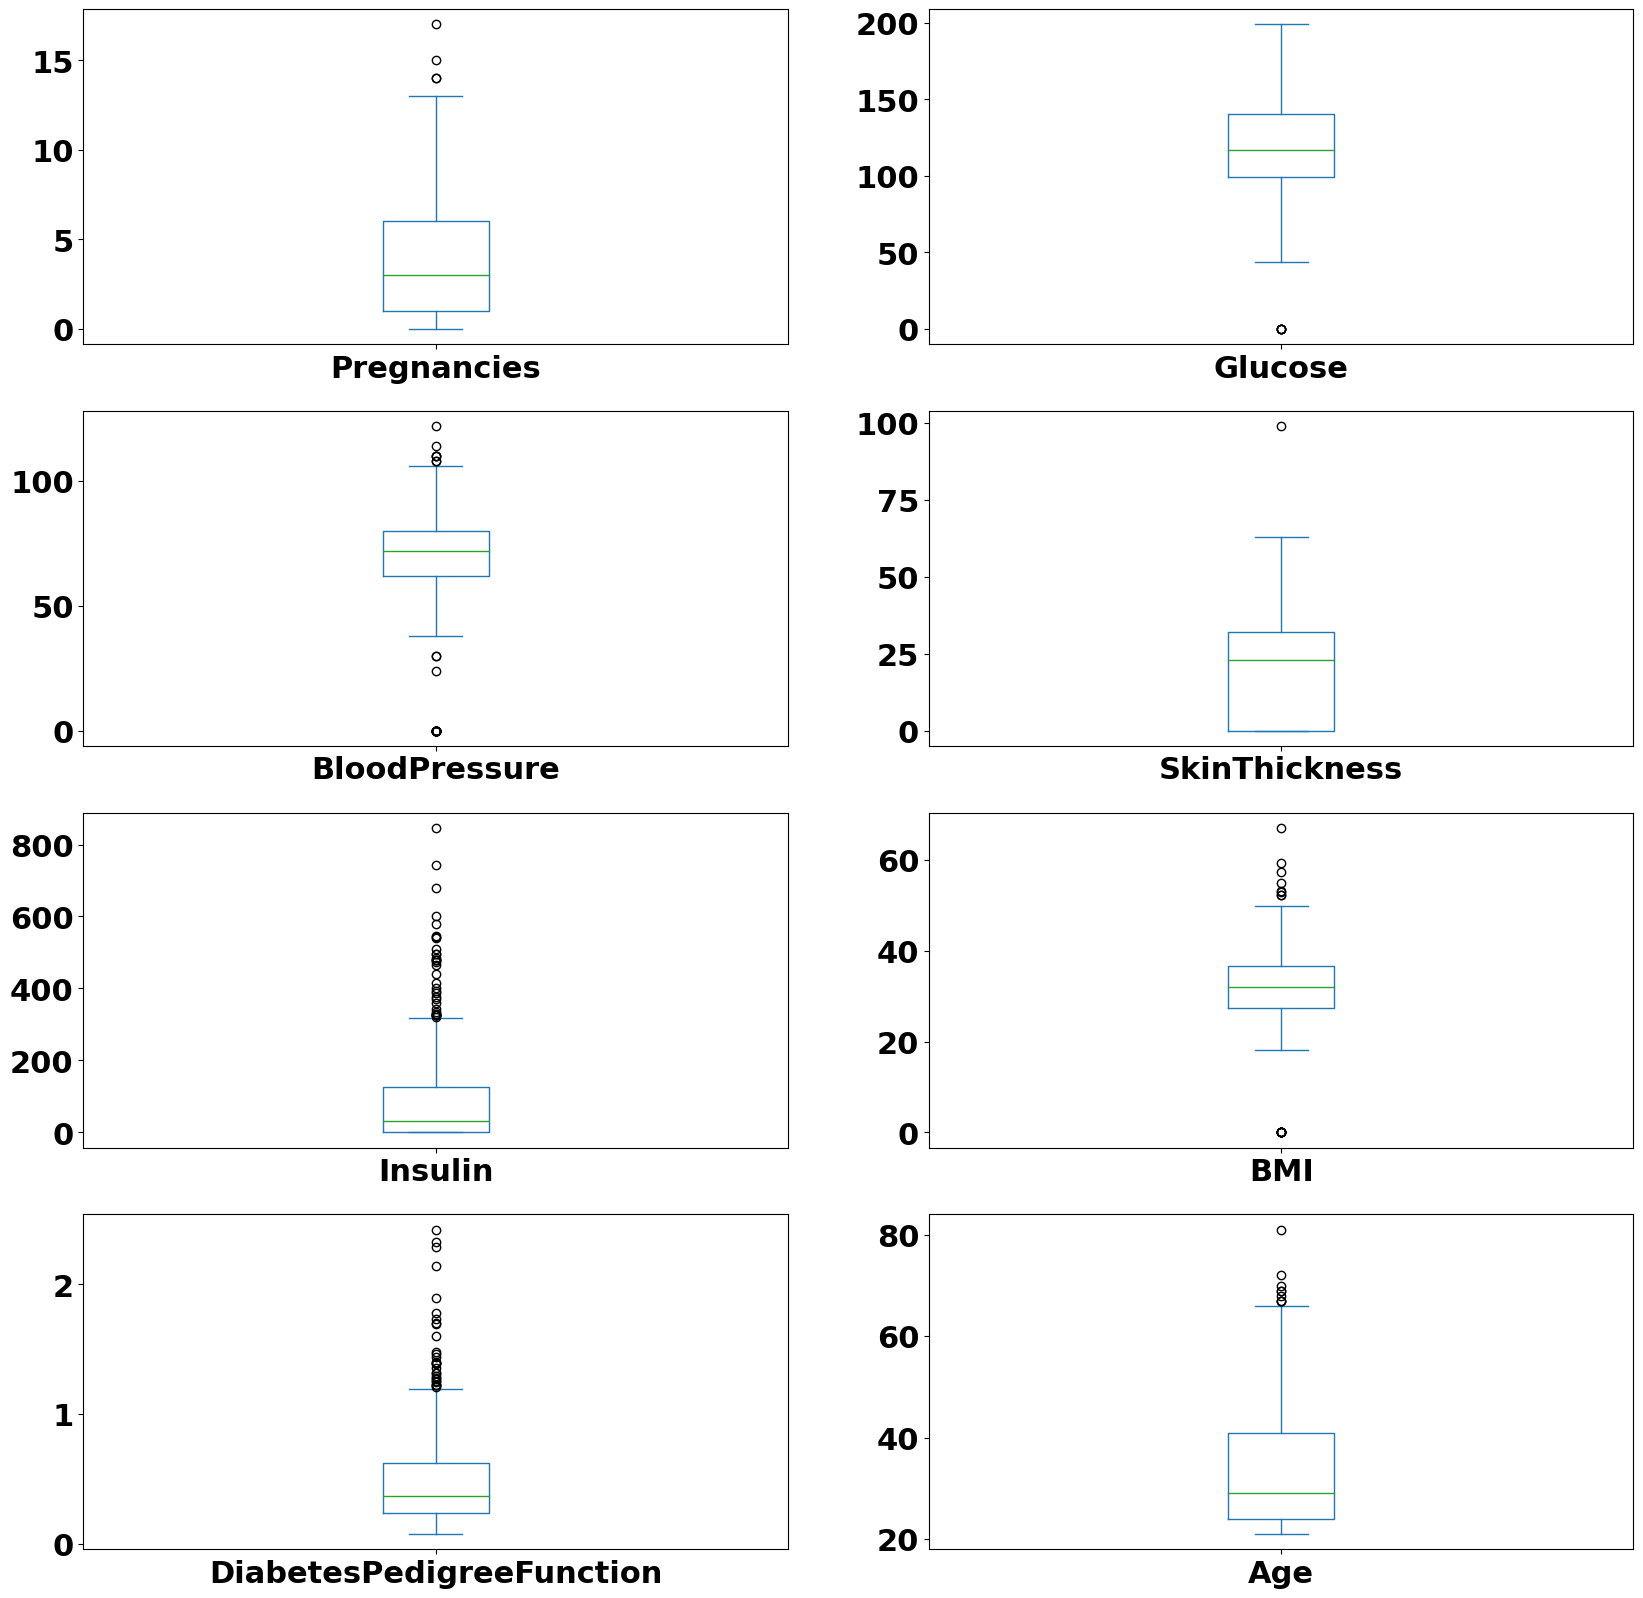

In [ ]:
#drawing box plot for each attribute
temp_df.plot(kind='box', subplots=True, layout=(4,2),\
sharex=False, sharey=False,figsize=(20,20))
plt.show()

In [ ]:
print('Plotted histogram and box plot helped in exploring about range of\
\nvalues for each attribute of the given data set.')

Plotted histogram and box plot helped in exploring about range of
values for each attribute of the given data set.


## Model Trainin and Evaluation


Now we will train different classification ML algorithms and evaluate their performance to diagnose the diabetes
based on the given attributes in the dataset. We will be using some classification ML algorithms from scikit-learn library in the beginning and then we will use the ML algorithms from the AutoGluon Library

We made sure same training and test are used during the evaluaton of ML from scikit-learn and autogluon by defining the split with the parameter seed = 42.

Also, In general, only one (mostly accuracy) evaluation metric is used to evaluate the performance of the ML algorithms. However, in our study we are using four evaluation metrics primarily because the two reasons.  The first reason is that in the used diabetes dataset Outcome class variables is highly imbalanced toward the  value 0, and the accuracy measure from the imbalanced dataset can be misleading. The next reason is that we are trying to avoid the case of accuracy paradox by considering four evaluation metrics.

Lets start by splitting the dataset into train and test dataset.

In [ ]:
from sklearn import model_selection

print('Hence, we have splitted the data into 80 percent as a\
\ntraining data set and the rest as test data. We used name validation for the test dataset')
array = df.values
print('ARRAY',array)
X = array[:,0:7]
print('x',X)
Y = array[:,8]
print('y',Y)

seed = 42
X_train,X_validation,Y_train,Y_validation= model_selection.train_test_split(X,Y,test_size=0.2,random_state=seed)

Hence, we have splitted the data into 80 percent as a
training data set and the rest as test data. We used name validation for the test dataset
ARRAY [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
x [[  6.    148.     72.    ...   0.     33.6     0.627]
 [  1.     85.     66.    ...   0.     26.6     0.351]
 [  8.    183.     64.    ...   0.     23.3     0.672]
 ...
 [  5.    121.     72.    ... 112.     26.2     0.245]
 [  1.    126.     60.    ...   0.     30.1     0.349]
 [  1.     93.     70.    ...   0.     30.4     0.315]]
y [1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 




## Data Preprocessing





In this section, we preprocess the data before training our machine learning models. The preprocessing steps include handling missing values and scaling features.

1. Missing Value Imputation:
   - We impute missing values in the dataset using the mean strategy. Missing values are replaced with the mean of the respective feature.

2. Feature Scaling:
   - We standardize the features by scaling them to have a mean of 0 and a standard deviation of 1. This ensures that all features have the same scale, which is important for many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Preprocess the data
# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_validation_imputed = imputer.transform(X_validation)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_imputed)
X_validation = scaler.transform(X_validation_imputed)





## 1. Decision Tree Classifier



The code segment demonstrates the implementation and evaluation of a Decision Tree classifier. Decision Tree is a versatile and widely used classification algorithm that is capable of fitting complex decision boundaries. Here's a brief overview of the Decision Tree Classifier and its functioning:

### Decision Tree Classifier:
- Decision Tree is a non-parametric supervised learning algorithm used for classification and regression tasks.
- It partitions the feature space into a hierarchy of decision nodes, where each node represents a feature and each branch represents a decision based on that feature.
- The goal of a Decision Tree classifier is to create a model that predicts the target class by learning simple decision rules inferred from the input features.

### How Decision Tree Works on Data:
1. **Feature Selection**:
   - The algorithm selects the best feature that optimally splits the dataset into homogeneous subsets. It evaluates various splitting criteria such as Gini impurity or information gain to determine the best split.

2. **Recursive Splitting**:
   - The process of splitting continues recursively until one of the stopping criteria is met, such as reaching a maximum depth, minimum number of samples at a node, or no further improvement in impurity reduction.

3. **Leaf Node Creation**:
   - Once the splitting process is complete, leaf nodes are created, each representing a class label or regression value.

4. **Prediction**:
   - To make predictions for new instances, the Decision Tree traverses the tree from the root node to a leaf node based on the values of input features, and assigns the majority class (for classification) or average value (for regression) of the instances in that leaf node as the predicted output.

The provided code initializes, trains, and evaluates a Decision Tree classifier on the dataset, showcasing its usage and performance evaluation.


In [ ]:
#Using Decision Tree classifier
print('Decision tree classifier results: ')
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
model_dt= DecisionTreeClassifier()
model_dt=model_dt.fit(X_train,Y_train)
predictions_dt = model_dt.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_dt))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_dt))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_dt))

Decision tree classifier results: 
Accuracy score: 0.7207792207792207
Confusion matrix:
 [[73 26]
 [17 38]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.81      0.74      0.77        99
         1.0       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154



## 2. Naive Bayes Classifier


The following code snippet demonstrates the implementation and evaluation of a Naïve Bayes classifier, specifically the Gaussian Naïve Bayes variant. Naïve Bayes is a probabilistic classifier based on Bayes' theorem with the assumption of independence between features. Here's a breakdown of the steps:

### Naïve Bayes Classifier:
- Naïve Bayes is a family of simple probabilistic classifiers based on applying Bayes' theorem with strong independence assumptions between features.
- It is particularly suited for classification tasks with discrete features (e.g., word counts in text classification) and is commonly used in spam filtering, sentiment analysis, and document categorization.

### How Naïve Bayes Works on Data:
1. **Model Training**:
   - During training, Naïve Bayes estimates the probability distributions of each feature given each class from the training data.

2. **Conditional Probability Calculation**:
   - To make predictions for new instances, Naïve Bayes calculates the conditional probability of each class given the input features using Bayes' theorem and the estimated probability distributions.

3. **Class Prediction**:
   - The class with the highest conditional probability is predicted as the output class for the new instance.

### Model Evaluation:
- The code initializes, trains, and evaluates the Gaussian Naïve Bayes classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section showcases the usage and evaluation of the Naïve Bayes classifier, providing insights into its performance and suitability for the given dataset.


In [ ]:
# Using Naïve Bayes classifier
print('Naïve Bayes classifier Results:')
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB()
model_nb=model_nb.fit(X_train,Y_train)
predictions_nb = model_nb.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_nb))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_nb))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_nb))

Naïve Bayes classifier Results:
Accuracy score: 0.8116883116883117
Confusion matrix:
 [[86 13]
 [16 39]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.86        99
         1.0       0.75      0.71      0.73        55

    accuracy                           0.81       154
   macro avg       0.80      0.79      0.79       154
weighted avg       0.81      0.81      0.81       154





## 3. Perceptron Classifier



The following code snippet demonstrates the implementation and evaluation of a Perceptron classifier. The Perceptron is a linear binary classification algorithm that learns a decision boundary separating classes by adjusting weights based on misclassifications. Here's a breakdown of the steps:

### Perceptron Classifier:
- Perceptron is a type of linear classifier that makes predictions based on a linear combination of input features.

### How Perceptron Works on Data:
1. **Model Initialization**:
   - The Perceptron model is initialized with hyperparameters such as learning rate (eta0) and shuffle.

2. **Model Training**:
   - During training, the Perceptron algorithm updates the weights iteratively to minimize misclassifications.

3. **Prediction**:
   - After training, the Perceptron predicts the class labels for the validation data based on the learned weights.

### Model Evaluation:
- The code initializes, trains, and evaluates the Perceptron classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section demonstrates the usage and evaluation of the Perceptron classifier, providing insights into its performance and suitability for the given dataset.


In [ ]:
#Using Perceptron
print('Perceptron results: ')
from sklearn.linear_model import Perceptron
model_pn=Perceptron( eta0=0.01, shuffle=True)
model_pn=model_pn.fit(X_train,Y_train)
predictions_pn = model_pn.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_pn))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_pn))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_pn))

Perceptron results: 
Accuracy score: 0.6428571428571429
Confusion matrix:
 [[81 18]
 [37 18]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.69      0.82      0.75        99
         1.0       0.50      0.33      0.40        55

    accuracy                           0.64       154
   macro avg       0.59      0.57      0.57       154
weighted avg       0.62      0.64      0.62       154



## 4. Multilayer Perceptron (MLP) Classifier



The following code snippet demonstrates the implementation and evaluation of a Multilayer Perceptron (MLP) classifier. MLP is a type of artificial neural network that consists of multiple layers of nodes (neurons) and is capable of learning complex patterns in data. Here's a breakdown of the steps:

### Multilayer Perceptron (MLP) Classifier:
- MLP is a feedforward neural network model that learns by backpropagation, optimizing the weights to minimize a loss function.

### How Multilayer Perceptron (MLP) Works on Data:
1. **Data Preprocessing**:
   - The input features are standardized using StandardScaler to ensure that they have mean 0 and variance 1.

2. **Model Initialization**:
   - The MLPClassifier is initialized with hyperparameters such as solver, hidden_layer_sizes, and maximum number of iterations (max_iter).

3. **Model Training**:
   - The MLP model is trained on the standardized training data using the fit() method.

4. **Prediction**:
   - After training, predictions are made for the standardized validation data using the predict() method.

### Model Evaluation:
- The code initializes, trains, and evaluates the MLP classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section demonstrates the usage and evaluation of the Multilayer Perceptron (MLP) classifier, highlighting its ability to learn complex patterns in the given dataset.


In [ ]:
# Using Multilayer Perceptron
print('Multilayer Perceptron Results: ')
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
ss = StandardScaler()
ss.fit(X_train)
X_train1 = ss.transform(X_train)
X_validation1 = ss.transform(X_validation)
model_mlp=MLPClassifier(solver = 'lbfgs',hidden_layer_sizes=(13,13),max_iter=500)
model_mlp=model_mlp.fit(X_train1,Y_train)
predictions_mlp = model_mlp.predict(X_validation1)
print('Accuracy score:',accuracy_score(Y_validation,predictions_mlp))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_mlp))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_mlp))


Multilayer Perceptron Results: 
Accuracy score: 0.6688311688311688
Confusion matrix:
 [[73 26]
 [25 30]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.74      0.74      0.74        99
         1.0       0.54      0.55      0.54        55

    accuracy                           0.67       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.67      0.67       154



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)





##5.  Random Forest Classifier

The following code snippet demonstrates the implementation and evaluation of a Random Forest classifier. Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Here's a breakdown of the steps:

### Random Forest Classifier:
- Random Forest is an ensemble learning technique based on the aggregation of multiple decision trees.

### How Random Forest Works on Data:
1. *Model Initialization*:
   - The Random Forest classifier is initialized with hyperparameters such as the number of trees (n_estimators) and maximum number of features to consider for splitting (max_features).

2. *Model Training*:
   - The Random Forest model is trained on the training data using the fit() method.

3. *Prediction*:
   - After training, predictions are made for the validation data using the predict() method.

### Model Evaluation:
- The code initializes, trains, and evaluates the Random Forest classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section demonstrates the usage and evaluation of the Random Forest classifier, highlighting its effectiveness in handling complex datasets and achieving high predictive accuracy.

In [ ]:
# Using Random Forest Classifier
print('Random Forest Classifier Results: ')
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, Y_train)
predictions_rf = model_rf.predict(X_validation)
print('Accuracy score:', accuracy_score(Y_validation, predictions_rf))
print('Confusion matrix:\n', confusion_matrix(Y_validation, predictions_rf))
print('\nClassification Report: \n', classification_report(Y_validation, predictions_rf))


Random Forest Classifier Results: 
Accuracy score: 0.7467532467532467
Confusion matrix:
 [[80 19]
 [20 35]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.81      0.80        99
         1.0       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154






## *6*. VotingClassifier


The following code snippet demonstrates the implementation and evaluation of a Voting Classifier using ensemble learning. The Voting Classifier combines the predictions from multiple individual models and predicts the class label by taking a majority vote (hard voting) or averaging predicted probabilities (soft voting). Here's a breakdown of the steps:

### Voting Classifier (Ensemble Learning):
- Voting Classifier is an ensemble learning technique that combines the predictions of multiple base classifiers.

### How Voting Classifier Works on Data:
1. **Model Initialization**:
   - The Voting Classifier is initialized with a list of sub-models (base classifiers) and the voting strategy (hard or soft).

2. **Model Training**:
   - The ensemble model is trained on the training data using the fit() method, which trains each base classifier in the ensemble.

3. **Prediction**:
   - After training, predictions are made for the validation data using the predict() method, where each base classifier contributes to the final prediction.

### Model Evaluation:
- The code initializes, trains, and evaluates the Voting Classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the ensemble model on the validation data.

This section demonstrates the usage and evaluation of the Voting Classifier, showcasing its ability to improve predictive performance through model aggregation and ensemble learning.


In [ ]:
from sklearn.ensemble import VotingClassifier
kfold = model_selection.KFold(n_splits=10)
# create the sub models
estimators = []
model1 = RandomForestClassifier()
estimators.append(('rf', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = MLPClassifier()
estimators.append(('mlp', model3))
model4=GaussianNB()
estimators.append(('nb',model4))
# create the ensemble model
ensemble = VotingClassifier(estimators,voting='soft')
model_ensemble=ensemble.fit(X_train,Y_train)
predictions_en = model_ensemble.predict(X_validation)
print('Accuracy score:',accuracy_score(Y_validation,predictions_en))
print('Confusion matrix:\n',confusion_matrix(Y_validation,predictions_en))
print('\nClassification Report: \n',classification_report(Y_validation,\
predictions_en))

Accuracy score: 0.7792207792207793
Confusion matrix:
 [[81 18]
 [16 39]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.82      0.83        99
         1.0       0.68      0.71      0.70        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 7. Support Vector Machines Classifier


The following code snippet demonstrates the implementation and evaluation of a Support Vector Machines (SVM) classifier. SVM is a powerful supervised learning algorithm used for classification and regression tasks. Here's a breakdown of the steps:

### Support Vector Machines (SVM) Classifier:
- SVM is a supervised learning algorithm that finds the optimal hyperplane in an N-dimensional space to separate classes with the maximum margin.

### How Support Vector Machines (SVM) Works on Data:
1. **Model Initialization**:
   - The SVM classifier is initialized with default hyperparameters.

2. **Model Training**:
   - The SVM model is trained on the training data using the fit() method, where it learns the optimal hyperplane to separate the classes.

3. **Prediction**:
   - After training, predictions are made for the validation data using the predict() method, which assigns class labels based on the side of the hyperplane the data points fall.

### Model Evaluation:
- The code initializes, trains, and evaluates the SVM classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section demonstrates the usage and evaluation of the Support Vector Machines (SVM) classifier, showcasing its effectiveness in handling both linear and non-linear classification problems.


In [ ]:
# Support Vector Machines Classifier
print('SUPPORT VECTOR MACHINES CLASSIFIER RESULTS:')
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train, Y_train)
predictions_svm = model_svm.predict(X_validation)

print('Accuracy score:', accuracy_score(Y_validation, predictions_svm))
print('Confusion matrix:\n', confusion_matrix(Y_validation, predictions_svm))
print('\nClassification Report: \n', classification_report(Y_validation, predictions_svm))


SUPPORT VECTOR MACHINES CLASSIFIER RESULTS:
Accuracy score: 0.7532467532467533
Confusion matrix:
 [[85 14]
 [24 31]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.78      0.86      0.82        99
         1.0       0.69      0.56      0.62        55

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



## 8. Nearest Neighbors (KNN) Classifier



The following code snippet demonstrates the implementation and evaluation of a Nearest Neighbors (KNN) classifier. KNN is a simple and intuitive classification algorithm that classifies new instances based on the majority class of their k nearest neighbors in the feature space. Here's a breakdown of the steps:

### Nearest Neighbors (KNN) Classifier:
- KNN is a non-parametric and instance-based learning algorithm that stores the entire training dataset during training and makes predictions based on similarity measures.

### How Nearest Neighbors (KNN) Works on Data:
1. **Model Initialization**:
   - The KNN classifier is initialized with default hyperparameters.

2. **Model Training**:
   - KNN is a lazy learning algorithm and does not involve an explicit training step. During training, the algorithm stores the entire training dataset.

3. **Prediction**:
   - After training, predictions are made for the validation data using the predict() method. For each instance, the algorithm finds its k nearest neighbors in the feature space and assigns the majority class label among them.

### Model Evaluation:
- The code initializes, trains, and evaluates the KNN classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section demonstrates the usage and evaluation of the Nearest Neighbors (KNN) classifier, highlighting its simplicity and effectiveness in classification tasks.


In [ ]:
# Nearest Neighbors (KNN) Classifier
print('NEAREST NEIGHBORS CLASSIFIER RESULTS:')
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)
predictions_knn = model_knn.predict(X_validation)

print('Accuracy score:', accuracy_score(Y_validation, predictions_knn))
print('Confusion matrix:\n', confusion_matrix(Y_validation, predictions_knn))
print('\nClassification Report: \n', classification_report(Y_validation, predictions_knn))

NEAREST NEIGHBORS CLASSIFIER RESULTS:
Accuracy score: 0.7272727272727273
Confusion matrix:
 [[83 16]
 [26 29]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.76      0.84      0.80        99
         1.0       0.64      0.53      0.58        55

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



## 9. Logistic Regression Classifier



The following code snippet demonstrates the implementation and evaluation of a Logistic Regression classifier. Logistic Regression is a linear classification algorithm used for binary classification tasks. Here's a breakdown of the steps:

### Logistic Regression Classifier:
- Logistic Regression is a type of regression analysis used for predicting the probability of a binary outcome.

### How Logistic Regression Works on Data:
1. **Model Initialization**:
   - The Logistic Regression classifier is initialized with default hyperparameters.

2. **Model Training**:
   - The Logistic Regression model is trained on the training data using the fit() method, where it learns the coefficients for the linear decision boundary.

3. **Prediction**:
   - After training, predictions are made for the validation data using the predict() method. The model calculates the probability of the positive class using the logistic function and assigns class labels based on a threshold (usually 0.5).

### Model Evaluation:
- The code initializes, trains, and evaluates the Logistic Regression classifier on the dataset.
- Evaluation metrics such as accuracy score, confusion matrix, and classification report are generated to assess the performance of the classifier on the validation data.

This section demonstrates the usage and evaluation of the Logistic Regression classifier, showcasing its effectiveness in binary classification tasks.


In [ ]:
# Using Logistic Regression
print('Logistic Regression Results:')
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
predictions_lr = model_lr.predict(X_validation)

print('Accuracy score:', accuracy_score(Y_validation, predictions_lr))
print('Confusion matrix:\n', confusion_matrix(Y_validation, predictions_lr))
print('\nClassification Report: \n', classification_report(Y_validation, predictions_lr))


Logistic Regression Results:
Accuracy score: 0.7792207792207793
Confusion matrix:
 [[84 15]
 [19 36]]

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.85      0.83        99
         1.0       0.71      0.65      0.68        55

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



## Sorted Accuracy Scores

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
from tabulate import tabulate

# Initialize a list to store model names and accuracy scores
accuracy_scores = []

# Compute accuracy scores for each model
models = [
    ("Decision Tree classifier", model_dt),
    ("Naïve Bayes classifier", model_nb),
    ("Perceptron", model_pn),
    ("Multilayer Perceptron", model_mlp),
    ("Random Forest Classifier", model_rf),
    ("Voting Classifier", model_ensemble),
    ("Support Vector Machines Classifier", model_svm),
    ("Nearest Neighbors Classifier", model_knn),
    ("Logistic Regression", model_lr)
]

for model_name, model in models:
    predictions = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation, predictions)
    accuracy_scores.append((model_name, accuracy))


# Sort the list of tuples based on accuracy scores in descending order
sorted_accuracy_scores = sorted(accuracy_scores, key=lambda x: x[1], reverse=True)

# Print sorted accuracy scores in a table
print("Sorted Accuracy Scores (from high to low):")
accuracy_table = [["Model", "Accuracy"]]
for model_name, accuracy in sorted_accuracy_scores:
    accuracy_table.append([model_name, f"{accuracy * 100:.2f}%"])

print(tabulate(accuracy_table, headers="firstrow", tablefmt="grid"))



Sorted Accuracy Scores (from high to low):
+------------------------------------+------------+
| Model                              | Accuracy   |
+====================================+============+
| Naïve Bayes classifier             | 81.17%     |
+------------------------------------+------------+
| Voting Classifier                  | 77.92%     |
+------------------------------------+------------+
| Logistic Regression                | 77.92%     |
+------------------------------------+------------+
| Support Vector Machines Classifier | 75.32%     |
+------------------------------------+------------+
| Random Forest Classifier           | 74.68%     |
+------------------------------------+------------+
| Nearest Neighbors Classifier       | 72.73%     |
+------------------------------------+------------+
| Decision Tree classifier           | 72.08%     |
+------------------------------------+------------+
| Multilayer Perceptron              | 66.88%     |
+--------------------

## Sorted Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Initialize a list to store classification reports
classification_reports = []

# Generate classification reports for each model
reports = [
    ("Decision Tree classifier", predictions_dt),
    ("Naïve Bayes classifier", predictions_nb),
    ("Perceptron", predictions_pn),
    ("Multilayer Perceptron", predictions_mlp),
    ("Random Forest Classifier", predictions_rf),
    ("Voting Classifier", predictions_en),
    ("Support Vector Machines Classifier", predictions_svm),
    ("Nearest Neighbors Classifier", predictions_knn),
    ("Logistic Regression", predictions_lr)
]

for model_name, predictions in reports:
    report = classification_report(Y_validation, predictions, output_dict=True)
    classification_reports.append({'Model': model_name, 'Precision': report['weighted avg']['precision'],
                                   'Recall': report['weighted avg']['recall'], 'F1-score': report['weighted avg']['f1-score']})

# Sort the list of dictionaries based on Precision, Recall, and F1-score in descending order
sorted_reports = sorted(classification_reports, key=lambda x: (x['Precision'], x['Recall'], x['F1-score']), reverse=True)

# Print the sorted table
print("Sorted Classification Report:")
print("{:<40} {:<15} {:<15} {:<15}".format('Model', 'Precision', 'Recall', 'F1-score'))
for report in sorted_reports:
    print("{:<40} {:<15.2f} {:<15.2f} {:<15.2f}".format(report['Model'], report['Precision'], report['Recall'], report['F1-score']))


Sorted Classification Report:
Model                                    Precision       Recall          F1-score       
Naïve Bayes classifier                   0.81            0.81            0.81           
Voting Classifier                        0.78            0.78            0.78           
Logistic Regression                      0.78            0.78            0.78           
Support Vector Machines Classifier       0.75            0.75            0.75           
Random Forest Classifier                 0.75            0.75            0.75           
Decision Tree classifier                 0.73            0.72            0.72           
Nearest Neighbors Classifier             0.72            0.73            0.72           
Multilayer Perceptron                    0.67            0.67            0.67           
Perceptron                               0.62            0.64            0.62           


## Model Evaluation Visualization

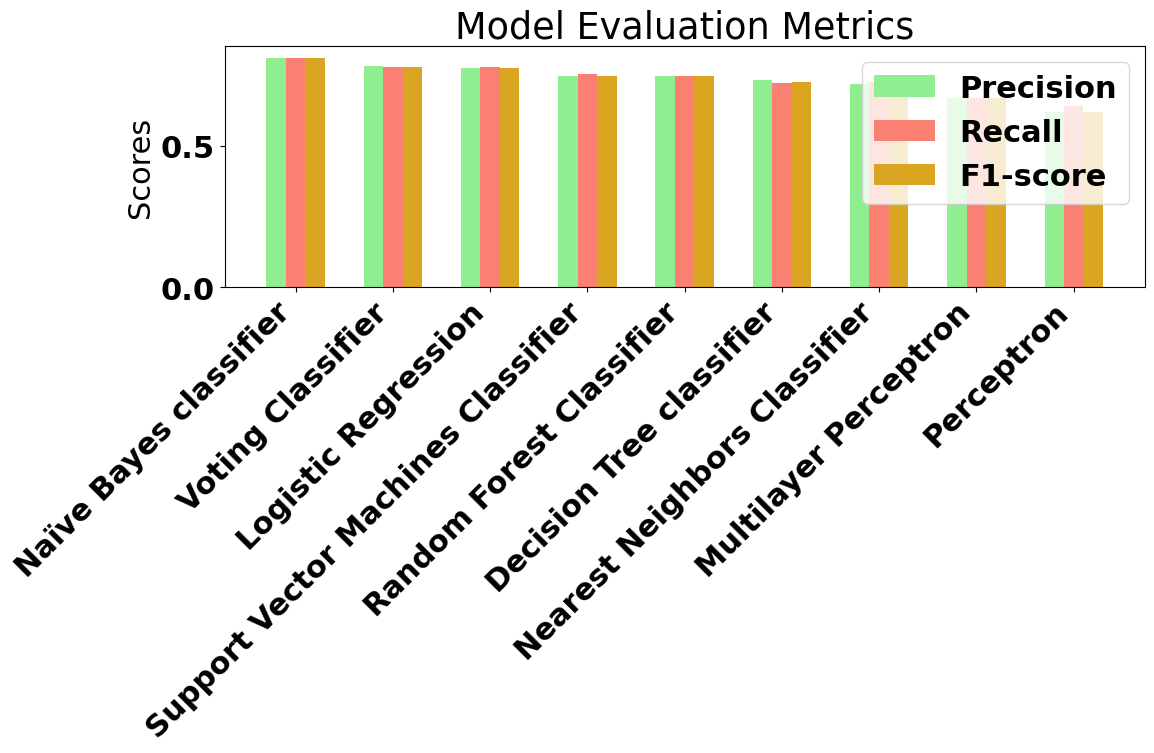

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and metrics for plotting
model_names = [report['Model'] for report in sorted_reports]
precision_scores = [report['Precision'] for report in sorted_reports]
recall_scores = [report['Recall'] for report in sorted_reports]
f1_scores = [report['F1-score'] for report in sorted_reports]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create positions for each bar
positions = range(len(model_names))

# Width of each bar
width = 0.2

# Plotting bars for each metric
ax.bar([pos + width for pos in positions], precision_scores, width, label='Precision', color='lightgreen')
ax.bar([pos + 2*width for pos in positions], recall_scores, width, label='Recall', color='salmon')
ax.bar([pos + 3*width for pos in positions], f1_scores, width, label='F1-score', color='goldenrod')

# Add labels and ticks
ax.set_xticks([pos + 2*width for pos in positions])
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.legend()

plt.tight_layout()
plt.show()


## Add Clustering


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the data
data_file = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv"  # the data file location
df = pd.read_csv(data_file)  # reading the data from the data file as pandas dataframe

print("\nThe instances present in the data set are")
print(df.shape, '\n')
print("And, the columns in the dataset are:\n", (df.columns), '\n')

print("The datatype of each column of the dataset is as below: \n")
print(df.info())

# Remove the label
X = df.drop(columns=['Outcome'])
y = df['Outcome']  # True labels for evaluation

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



The instances present in the data set are
(768, 9) 

And, the columns in the dataset are:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object') 

The datatype of each column of the dataset is as below: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   76

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, Birch

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Apply Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Apply MeanShift
mean_shift = MeanShift()
mean_shift_labels = mean_shift.fit_predict(X_scaled)

# Apply Birch
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

def evaluate_clustering(true_labels, pred_labels):
    print("Adjusted Rand Index (ARI):", adjusted_rand_score(true_labels, pred_labels))
    print("Adjusted Mutual Information (AMI):", adjusted_mutual_info_score(true_labels, pred_labels))
    print("Homogeneity:", homogeneity_score(true_labels, pred_labels))
    print("Completeness:", completeness_score(true_labels, pred_labels))
    print("V-Measure:", v_measure_score(true_labels, pred_labels))
    print()

print("Evaluation of KMeans Clustering:")
evaluate_clustering(y, kmeans_labels)

print("Evaluation of Agglomerative Clustering:")
evaluate_clustering(y, agglo_labels)

print("Evaluation of DBSCAN Clustering:")
# DBSCAN may assign some points as noise (-1 label), exclude them from evaluation
dbscan_labels_valid = dbscan_labels[dbscan_labels != -1]
y_valid = y[dbscan_labels != -1]
evaluate_clustering(y_valid, dbscan_labels_valid)

print("Evaluation of MeanShift Clustering:")
evaluate_clustering(y, mean_shift_labels)

print("Evaluation of Birch Clustering:")
evaluate_clustering(y, birch_labels)


Evaluation of KMeans Clustering:
Adjusted Rand Index (ARI): 0.13705543779388432
Adjusted Mutual Information (AMI): 0.09410363144001982
Homogeneity: 0.13794461974216496
Completeness: 0.07364228636188448
V-Measure: 0.09602255050828361

Evaluation of Agglomerative Clustering:
Adjusted Rand Index (ARI): 0.1035332496245436
Adjusted Mutual Information (AMI): 0.07030008143442505
Homogeneity: 0.08311350750410948
Completeness: 0.06340748509020724
V-Measure: 0.07193533697185811

Evaluation of DBSCAN Clustering:
Adjusted Rand Index (ARI): 1.0
Adjusted Mutual Information (AMI): 1.0
Homogeneity: 1.0
Completeness: 1.0
V-Measure: 1.0

Evaluation of MeanShift Clustering:
Adjusted Rand Index (ARI): 0.02621973033606101
Adjusted Mutual Information (AMI): 0.03227391321391884
Homogeneity: 0.026568560944242103
Completeness: 0.09366156406258404
V-Measure: 0.041394832996946754

Evaluation of Birch Clustering:
Adjusted Rand Index (ARI): 0.08676767818817901
Adjusted Mutual Information (AMI): 0.0807607979013024


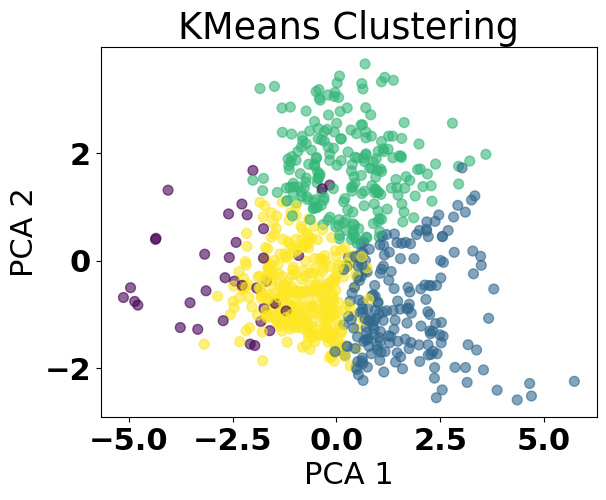

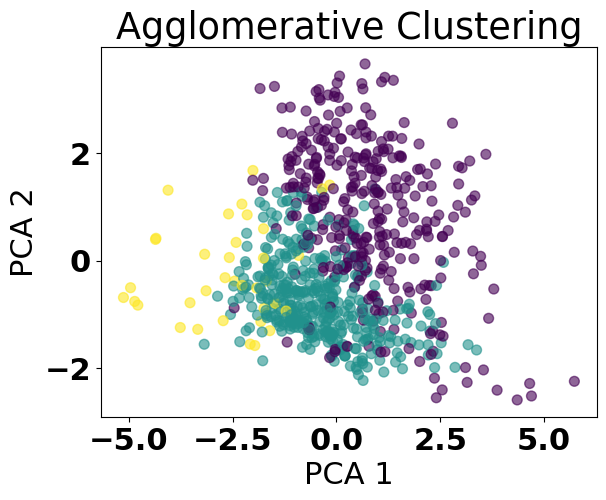

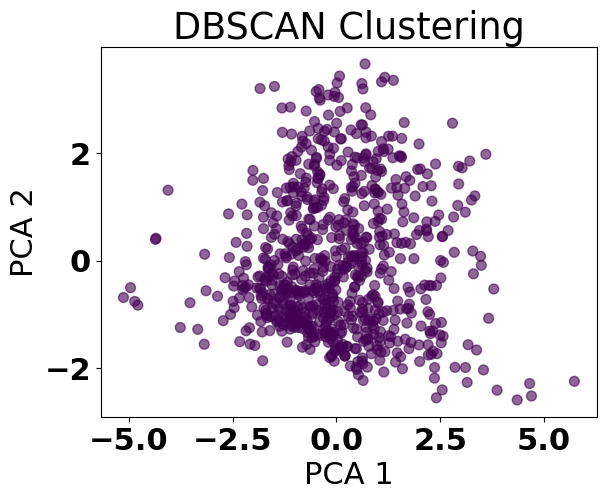

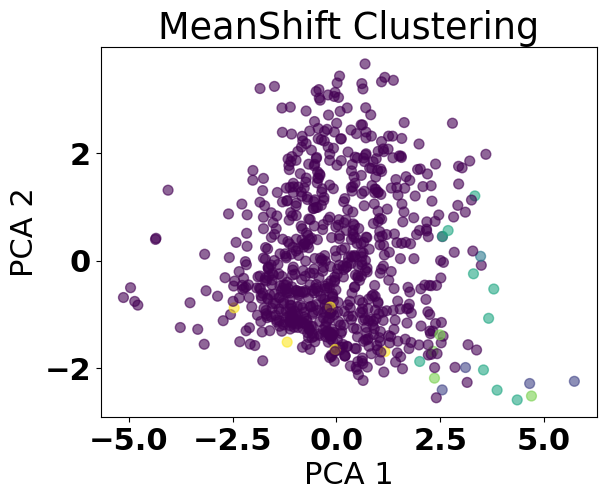

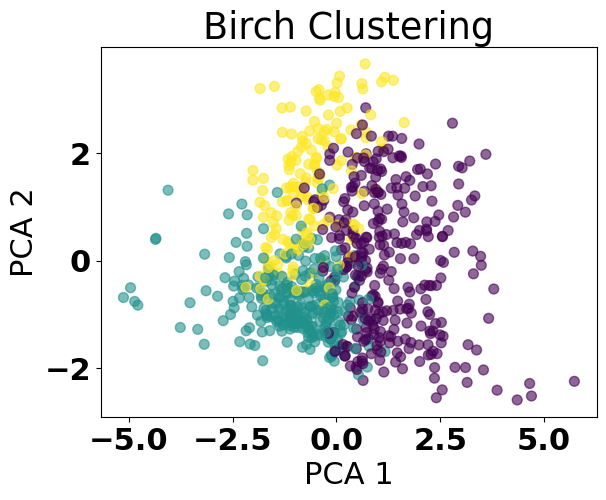

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

plot_clusters(X_scaled, kmeans_labels, 'KMeans Clustering')
plot_clusters(X_scaled, agglo_labels, 'Agglomerative Clustering')
plot_clusters(X_scaled, dbscan_labels, 'DBSCAN Clustering')
plot_clusters(X_scaled, mean_shift_labels, 'MeanShift Clustering')
plot_clusters(X_scaled, birch_labels, 'Birch Clustering')
